# ALGO_1. Linear Regression

- Linear regression uses the relationship between the data-points to draw a straight line through all them.

- This line can be used to predict future values.




In [ ]:
#necesary imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [ ]:
data = pd.read_csv('1_Advertising 41.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
data.shape

(200, 5)

In [ ]:
data.info() # print the summary of DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
data.isna().sum() # finding no. of NaNs in DataFrame

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

**Now, Let's see the relationship between the feature and targeted column (CORRELATION)**

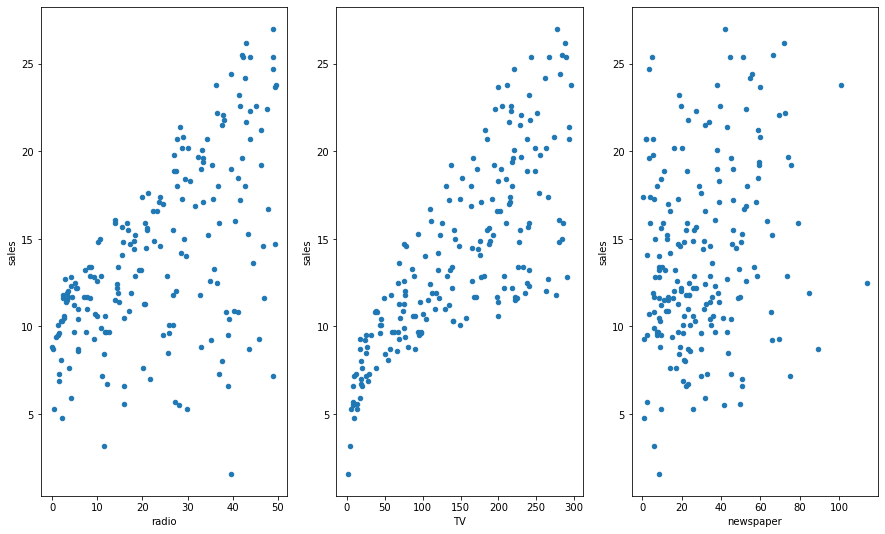

In [ ]:
# Visualize the relationship between the features and targeted column using 'Scatter plot':

fig,axs = plt.subplots(1,3)

data.plot(kind = 'scatter', x = 'TV', y = 'sales', ax = axs[1], figsize = (15,9))
data.plot(kind = 'scatter', x = 'radio', y = 'sales', ax = axs[0])
data.plot(kind = 'scatter', x = 'newspaper', y = 'sales', ax = axs[2])

# optionally used for Saving the Visualization (into your system) purpose only.
fig.savefig('testdata.jpg')

**Observations from above scatter plot:-**
- TV: Strong positive relationship.
- Radio: Positive relationship.
- Newspaper: Negative relationship.

**BEST FIT LINE:-** (good: If less residual)

- x: input | y: prediction/output | **y = mx + b**
- BEST FIT LINE must be **close to (or) covers most** of the data points of the plot.
- find ***m = ?***
- find ***b = ?***

**Actual data - Predicted data = Residual value**

### NOTE:
- **to avoid value of residual becoming zero** we use to **square them and then add**.(**eliminates negative effect** on calculation)
- **Gradient Descent :** learns and **reduces the Residual** to find best pattern.

In [ ]:
# SLR as 1feature and 1 label
#create X = feature & Y = Label
X = data[['TV']]
Y = data.sales # Y : Actual Value.

# follow the usual sklearn pattern: import, instantiate, fit

from sklearn.linear_model import LinearRegression # import
lm = LinearRegression() # instantiate
lm.fit(X,Y) # .fit : used to train the model.

LinearRegression()

In [ ]:
# print intercept(constant) & Coefficient(slope):

In [ ]:
print(lm.intercept_) # b: intercept of y-axis

7.032593549127693


In [ ]:
print(lm.coef_) # (Coefficient of x (or) slope: TV = 0.04753664 * sales

[0.04753664]


In [ ]:
# Beta1 = slope = coef_ of x

# ONE Unit increase wrt sales is called Coef

In [ ]:
# calculate the prediction if expence on TV ad is $50k=x.
y = lm.coef_ *50 + lm.intercept_
y

array([9.40942557])

In [ ]:
# calculate the prediction if expence on TV ad is $50k.
y = 0.047537*50 + 7.032594
y

9.409444

Thus, we can predict sales of **9409 units** in that market.

Let's do the same using code.

In [ ]:
# creating DataFrame, if $50k is expended on TV ad.
#X_new = pd.DataFrame({'TV': [50]}) # expence on TV ad is $50k.
#X_new

In [ ]:
# use the model to predict new value.
lm.predict([[50]])

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([9.40942557])

In [ ]:
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [ ]:
# use the model to predict new value.
lm.predict([[50]])

array([9.40942557])

In [ ]:
# calculated prediction (if expence on TV ad is $50k) is 61% correct.(to be studied thereafter)
# 61% -> r2_score

## How Least Squares Line changes, based on input data (Demo only)

- www.desmos.com/calculator/jwquvmikhr

# MODEL CONFIDENCE

**How well does the Model Fit the Data ?**
- how well system learns or trains itself (to predict) on percentage basis.


**R^2 statistics**


- The closer the value of R^2 wrt 1, the better the model fits our data. If R^2 comes below Zero(which is a possibility) that means the model is so bad, that it is performing even worse than the average best fit line.

**Metric to check model performance (r2_score)**
- Metric: Evaluating tools or techniques performance , E.g.: R^2 statistics(one of the tools).

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
X.head(3) # X = feature(TV)-- "x"

,TV
0,230.1
1,44.5
2,17.2


In [ ]:
Y.head(3) # Y: Actual value(Sales)-- "y"

0    22.1
1    10.4
2     9.3
Name: sales, dtype: float64

In [ ]:
# pass all tv records and predict sales due to TV ads only.

predicted_sales_TV = lm.predict(X) # PREDICTED VALUES-- "y(hat)"

predicted_sales_TV = pd.DataFrame(predicted_sales_TV)
predicted_sales_TV.head()
# Y^: Predicted value(predicted_sales_TV),

,0
0,17.970775
1,9.147974
2,7.850224
3,14.234395
4,15.627218


In [ ]:
# Let's compare original sales numbers (Y) with our model predicted sales (Y^).

r2_score(y_true = Y, y_pred = predicted_sales_TV)

0.611875050850071

- Our Model's prediction is 61% correct.

- Earlier, calculated prediction (if expence on TV ad is $50k) is also 61% correct.

**Simple Linear Regression:** only one feature used to predict.(like till here on 'TV' is used).***--R^2***

**Multiple Linear Regression:** more than 1 feature is used for prediction. (like from here on 'TV, Radio & News Paper' will be used).***--Adjusted R^2 statistics***

**Adjusted R^2 statistics:** (pulls down the values of R^2 statistics)


In [ ]:
# N= No. of Rows or Samples
# P= No. of Columns or features or predictions.

#- -> .shape-> (no. of rows, no. of columns)

In [ ]:
# Create X & y.
X = data[['TV','radio','newspaper']]
y = data['sales']

lm = LinearRegression() # Multiple Linear Regression
lm.fit(X,y)

LinearRegression()

In [ ]:
# Print b & m (printing best fit line):

print('Intercept : ->',lm.intercept_)
print('TV : ->',lm.coef_[0])
print('radio : ->',lm.coef_[1])
print('newspaper : ->',lm.coef_[2])

Intercept : -> 2.9388893694594085
TV : -> 0.045764645455397615
radio : -> 0.18853001691820448
newspaper : -> -0.0010374930424763007


**observation:**
- By "increasing investment" by 1Unit, the "sales" increased by that coef_.

**Observation:**

- TV: Strong positive relationship.
- Radio: Positive relationship.
- Newspaper: Negative relationship.

## **Feature Selection**

How do one can decide **which feature have to be included** in a linear model? Here's one idea:
- Check if the R-squared value goes up when you add new predictors to the model.

In [ ]:
#preparing data for R2_score on TV & Radio as we can see they are positively related (coef).
X= data[['TV',"radio"]] # features
y= data.sales # Labels

# let's train the model
lm.fit(X,y)

# Check the R2_score.

predicted_sales= lm.predict(X)
r2_score(y,predicted_sales)

0.8971942610828956

In [ ]:
#Let's do the same taking all the features.
X= data[['TV',"radio",'newspaper']] # features
y= data.sales # Labels

# let's train the model
lm.fit(X,y)

# Check the R2_score.

predicted_sales= lm.predict(X)
r2_score(y,predicted_sales)

0.8972106381789522

**Observation**:
- TV- 61%
- TV+Radio- 89.719% ~ 89.72%
- TV+Radio+newspaper- 89.721% ~ 89.72%
- **Newspaper has very least contribution wrt our label.**